#  Business Case: Yulu - Hypothesis Testing 

**About Yulu**
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles
for the daily commute. Starting off as a mission to eliminate traffic congestion in
India, Yulu provides the safest commute solution through a user-friendly mobile
app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations,
bus stands, office spaces, residential areas, corporate offices, etc) to make those
first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted
a consulting company to understand the factors on which the demand for these
shared electric cycles depends. Specifically, they want to understand the factors
affecting the demand for these shared electric cycles in the Indian market. 


https://drive.google.com/drive/folders/1fl9kl4n9_JM6248g0tk6hd6jvGiDh_M6?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway, kruskal # Numeric Vs categorical for many categories
from scipy.stats import ttest_ind # Numeric Vs categorical
from scipy.stats import shapiro # Test Gaussian (50 to 200 samples)
from scipy.stats import levene # Test variance
from scipy.stats import ks_2samp
from scipy.stats import norm
from scipy.stats import chi2_contingency , chisquare
from scipy.stats import ttest_1samp

from statsmodels.graphics.gofplots import qqplot

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option("display.max_rows",50)
pd.set_option("display.max_columns",50)

C:\Users\hp\AppData\Local\Temp\ipykernel_14388\2873301260.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
df = pd.read_csv("yulu.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### shape of dataset

In [4]:
df.shape

(10886, 12)

In [5]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 10886
Number of columns: 12


### Dtype of each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Datatype of following attributes needs to changed to proper data type
- datetime - to datetime
- season - to categorical
- holiday - to categorical
- workingdat - to categorical
- weather - to categorical

In [7]:
cat_cols = ['season','holiday','workingday','weather']

In [8]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [9]:
for col in cat_cols:
    df[col] = df[col].astype('category')

In [10]:
df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [11]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
df.describe(include="all")

C:\Users\hp\AppData\Local\Temp\ipykernel_14388\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


- casual and registered attributes might have outliers because their mean and median are very far away to one another and the valu of standard deviation is also high which tells us that there is high variance in the data of these attributes
- avg temperature is 20.23, max temperature is 41 and min temperature is 0
- avg humidity is 61.88, max humidity is 100 and min humidity is 0
- avg windspeed is 12.79, max windspeed is 56.99 and min windspeed is 0

## any null value

In [13]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## by using heatmap to show all null values

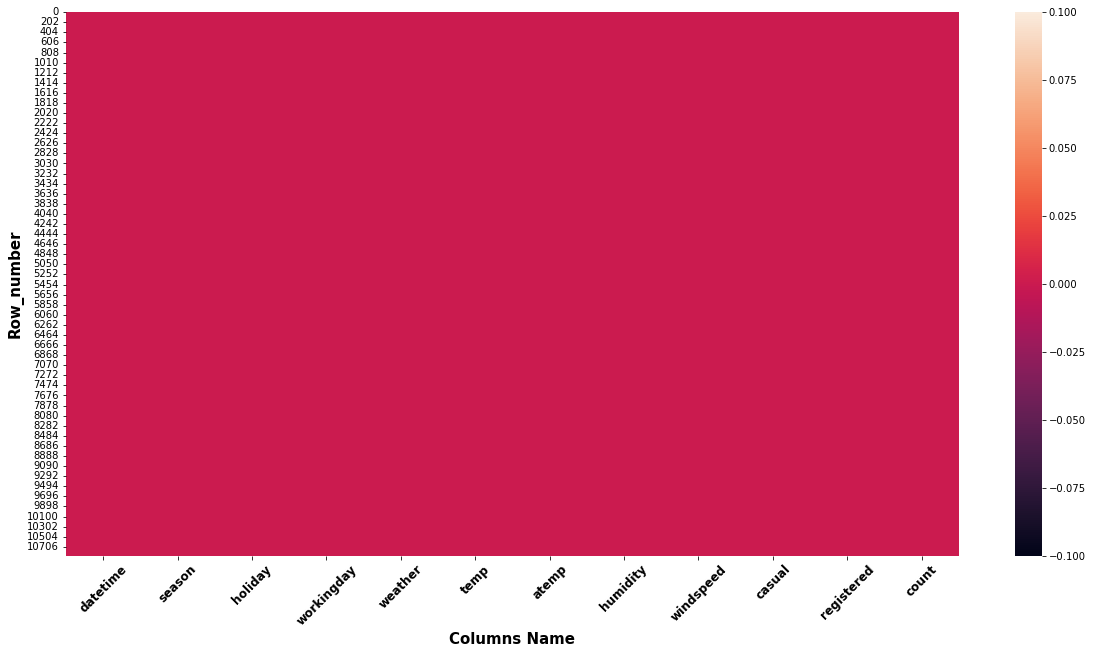

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.xlabel("Columns Name" , weight="bold" , fontsize=15)
plt.ylabel("Row_number" , weight="bold" , fontsize=15)
plt.xticks(rotation=45 , weight="bold",fontsize=12)
plt.show()

- There are no missing value in tha dataset

By extracting 'hour','month','year' data from datetime column we will be able to

In [15]:
df["hour"] = df["datetime"].dt.hour
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year

### convert hour into category

In [16]:
df["TimeSlot"] = df["hour"].apply(lambda x: "Dawn" if x<=4 else ("Early Morning"
                                                                        if x<=9 else ("Noon"
                                                                                      if x<=16 else ("Late Evening"
                                                                                                     if x<=21 else "Night"))))

## find how many unique value in column

 **season**

In [29]:
df["season"].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

**In season there is four unique value**
- 1: spring 
- 2: summer 
- 3: fall
- 4: winter

  **holiday**

In [30]:
df["holiday"].unique()

[0, 1]
Categories (2, int64): [0, 1]

**workingday**

In [32]:
df["workingday"].unique()

[0, 1]
Categories (2, int64): [0, 1]

**In workingday there is two unique value**
- 0: Holiday, weekend 
- 1: working day 

**weather**

In [33]:
df["weather"].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

**In weather there is four unique value**
- 1: Clear, Few clouds, partly cloudy, partly cloudy 
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

## Understanding the distribution of the data for the qualitative attributes:

In [28]:
df[cat_cols].melt().groupby(["variable","value"])[["value"]].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

# Univariate Analysis

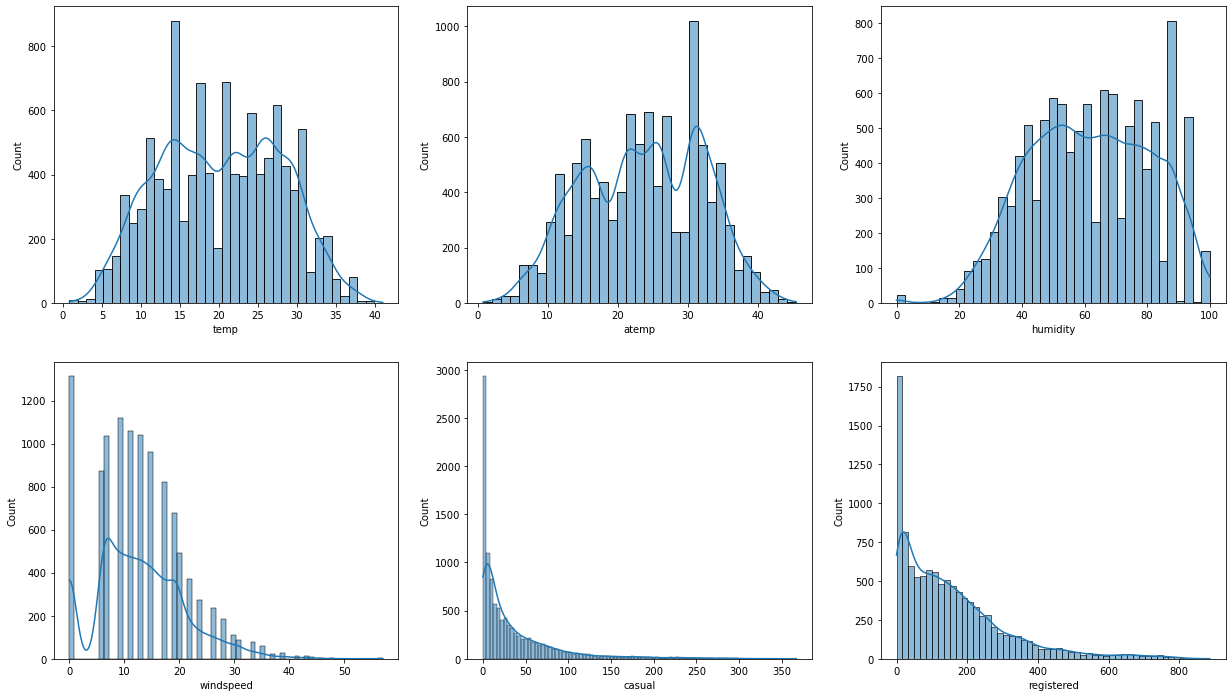

<function matplotlib.pyplot.show(close=None, block=None)>

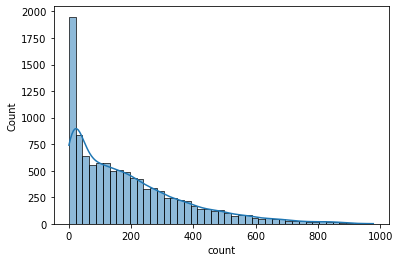

In [18]:
num_cols = ['temp','atemp','humidity','windspeed','casual','registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(21, 12))

index=0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]] , ax=axis[row,col] , kde=True)
        index+=1
plt.show()
sns.histplot(df[num_cols[-1]] , kde=True)
plt.show

- **casual, registered and count** somewhat looks like **Log Normal Distribtion**
- **temp, atemp and humidity** looks like they follows the **Normal distribution**
- **windspeed** follows the **binomial distribution**

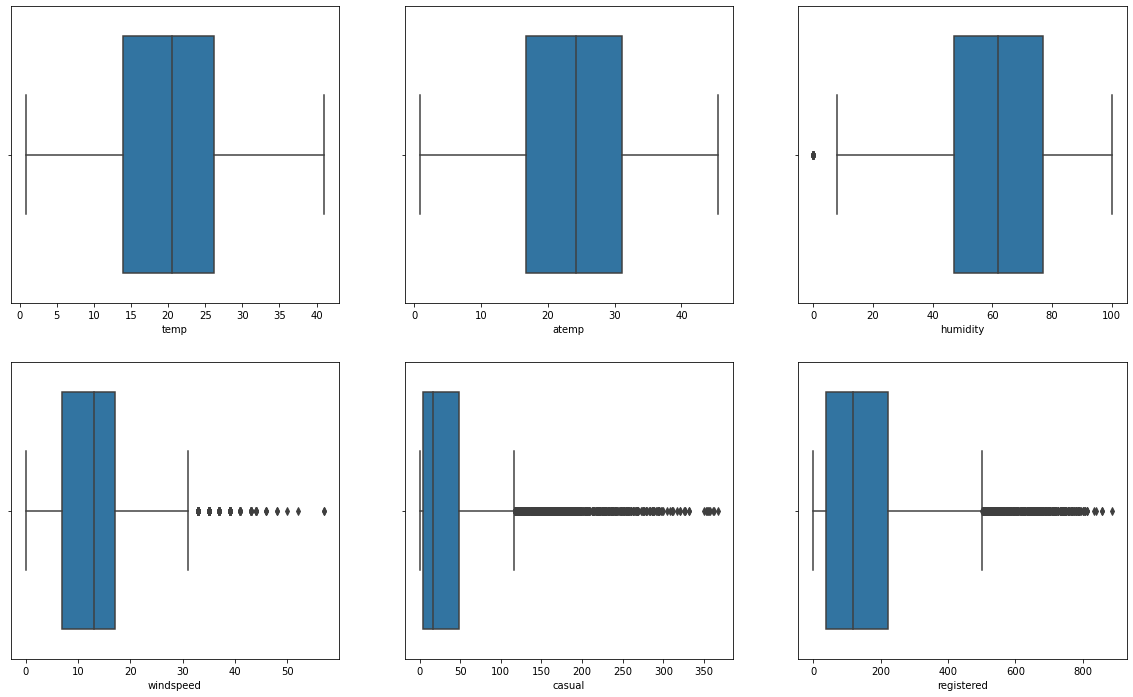

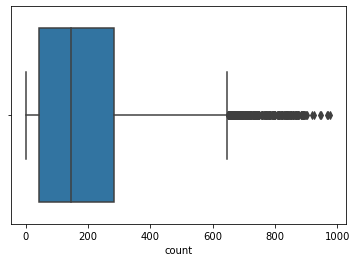

In [19]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

index=0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]] , ax=axis[row,col])
        index+=1
plt.show()
sns.boxplot(x=df[num_cols[-1]])
plt.show()

- **temp, atemp** has not outliers in the data
- **humidity and windspeed** has some outliers  in the data
- **casual, registered and count** has more outliers  in the data

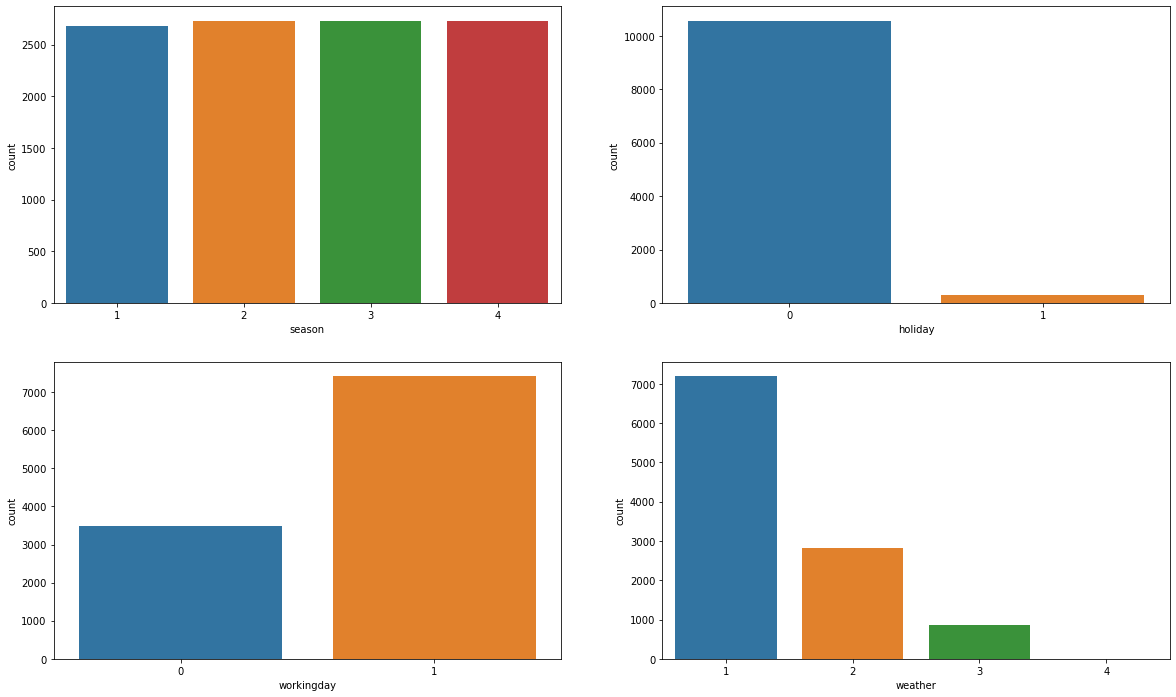

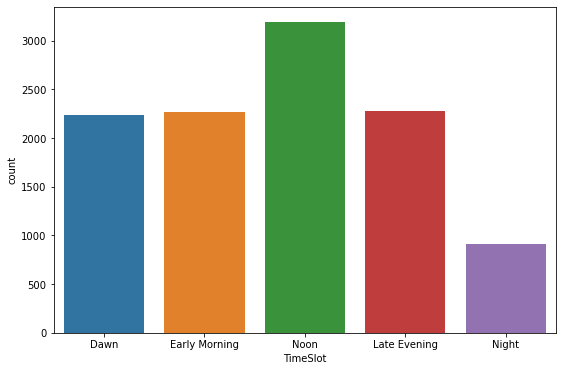

In [20]:
num_cat_cols=['season','holiday','workingday','weather','TimeSlot']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

index=0
for row in range(2):
    for col in range(2):
        sns.countplot(x=df[num_cat_cols[index]] , ax=axis[row,col])
        index+=1
plt.show()
plt.figure(figsize=[9,6])
sns.countplot(x=df[num_cat_cols[-1]])
plt.show()

- In every season people love to ride equal
- most of people ride on **working day**
- When Weather is clear, few **clouds, partly, cloudy, partly cloudy** morpeople ride and use bike
- most of people rented bike on **noon time**

# Bi-variate Analysis

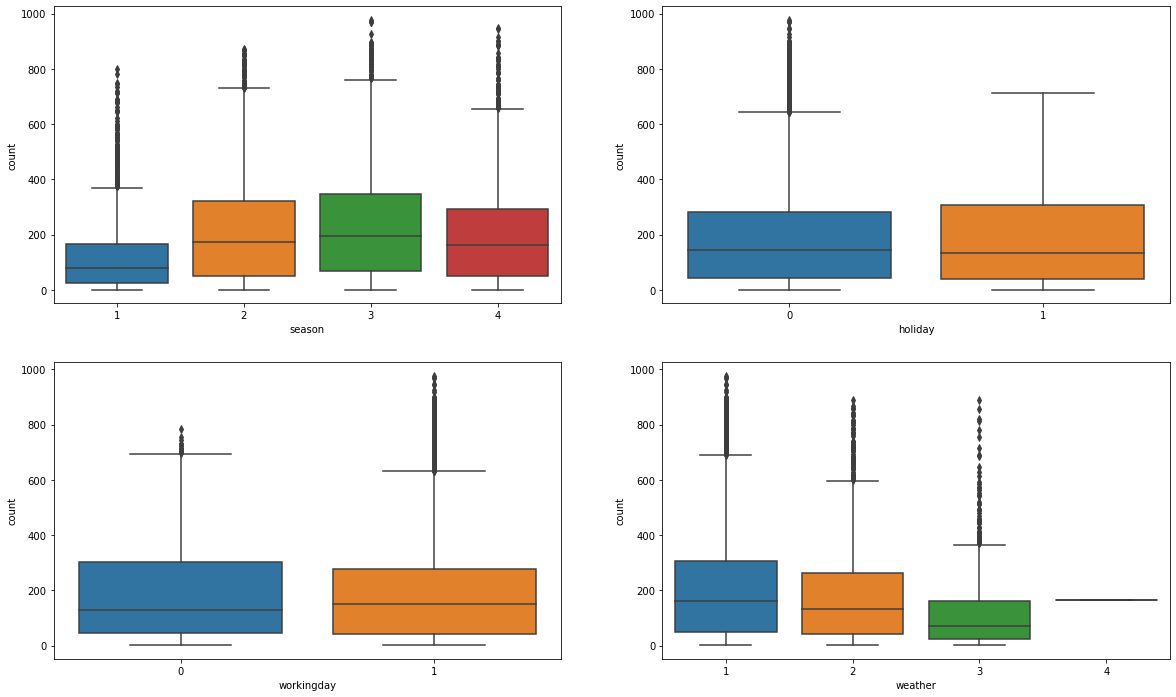

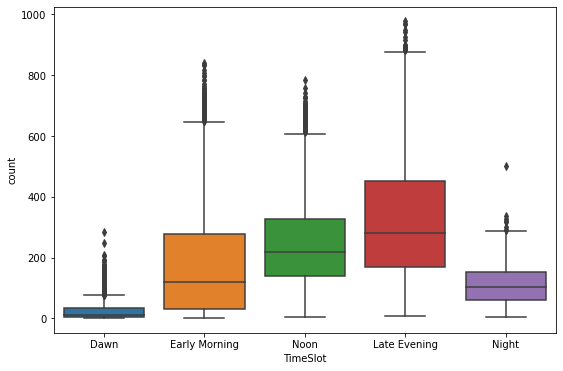

In [21]:
num_cat_cols=['season','holiday','workingday','weather','TimeSlot']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

index=0
for row in range(2):
    for col in range(2):
        sns.boxplot(x=df[num_cat_cols[index]] ,y=df['count'], ax=axis[row,col])
        index+=1
plt.show()
plt.figure(figsize=[9,6])
sns.boxplot(x=df[num_cat_cols[-1]],y=df['count'])
plt.show()

- In **summer** and **fall** seasons more bikes are rented as compared to other seasons.
- Whenever its a **holiday** more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
- Whenever there is **rain, thunderstorm, snow or fog**, there were less bikes were rented.
- Most people rented bike in **late Evening**

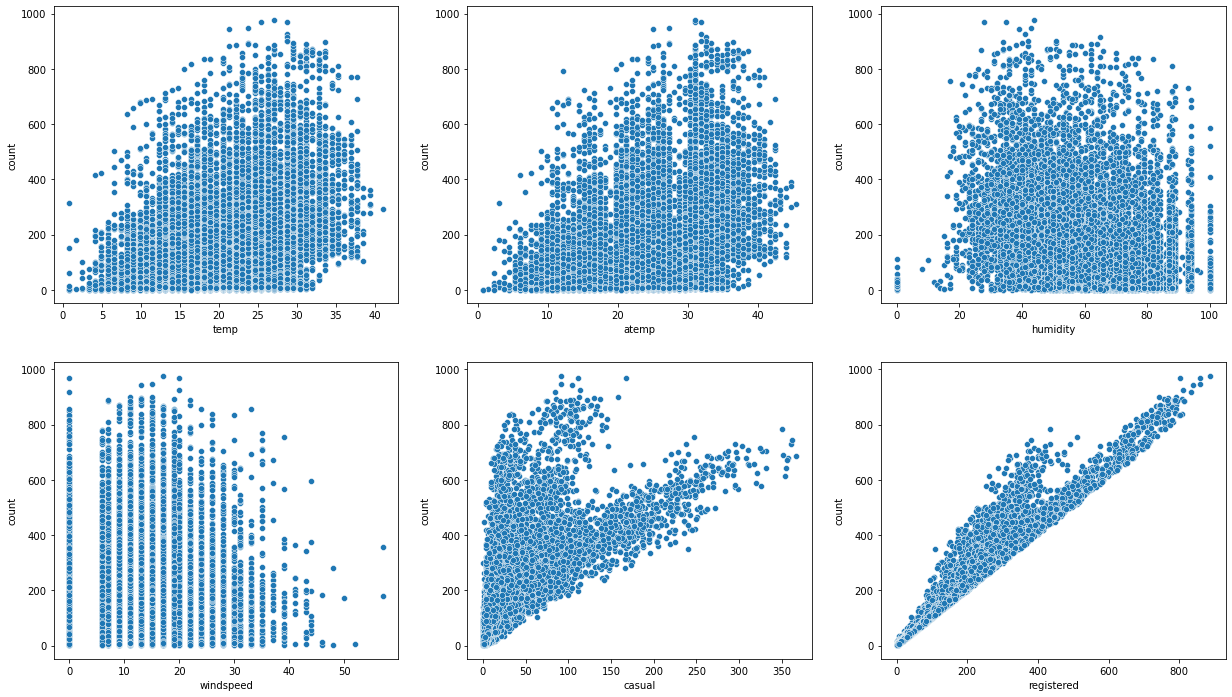

In [22]:
num_cols = ['temp','atemp','humidity','windspeed','casual','registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(21, 12))

index=0
for row in range(2):
    for col in range(3):
        sns.scatterplot(x=df[num_cols[index]] ,y=df[num_cols[-1]] ,ax=axis[row,col])
        index+=1
plt.show()

- Whenever the humidity is less than 20, number of bikes rented is very very low.
- Whenever the temperature is less than 10, number of bikes rented is less.
- Whenever the windspeed is greater than 35, number of bikes rented is less.

## when most of customer rented bike?

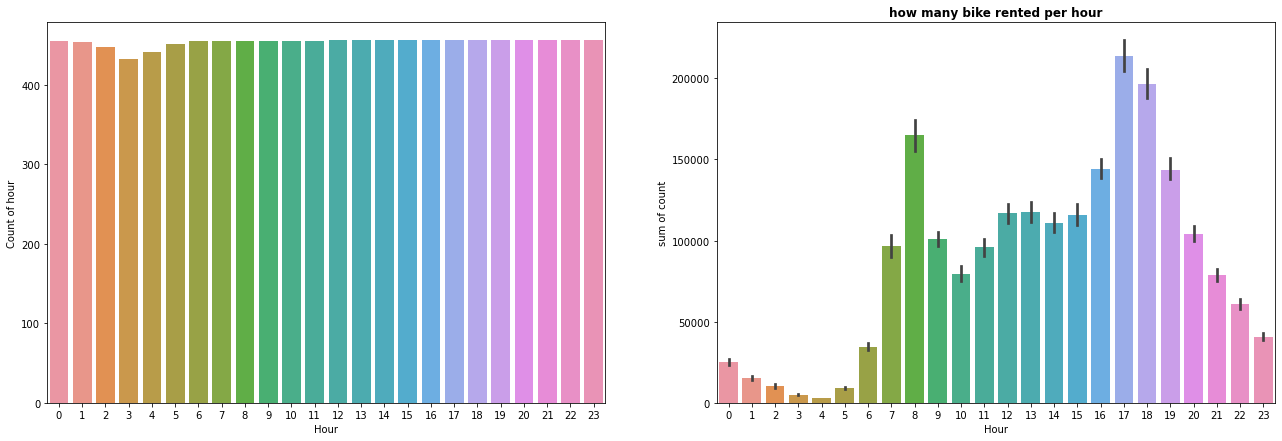

In [64]:
plt.figure(figsize=[22,7])

plt.subplot(1,2,1)
sns.countplot(data=df , x="hour")
plt.xlabel("Hour" )
plt.ylabel("Count of hour" )

plt.subplot(1,2,2)
sns.barplot(data=df , x="hour" , y='count' , estimator=sum)
plt.xlabel("Hour" )
plt.ylabel("sum of count" )
plt.title("how many bike rented per hour",weight='bold')
plt.show()

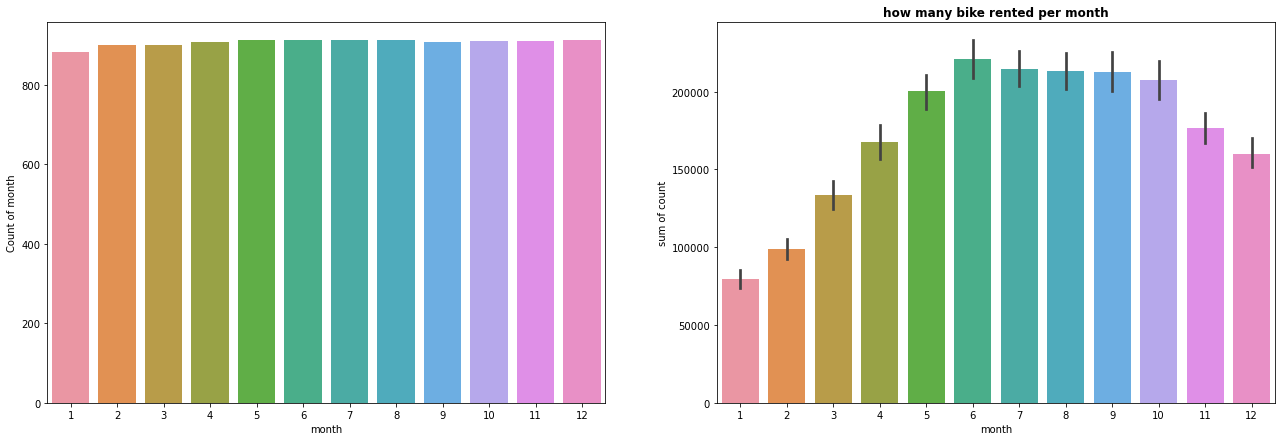

In [65]:
plt.figure(figsize=[22,7])

plt.subplot(1,2,1)
sns.countplot(data=df , x="month")
plt.xlabel("month" )
plt.ylabel("Count of month" )

plt.subplot(1,2,2)
sns.barplot(data=df , x="month" , y='count' , estimator=sum)
plt.xlabel("month" )
plt.ylabel("sum of count" )
plt.title("how many bike rented per month",weight='bold')
plt.show()

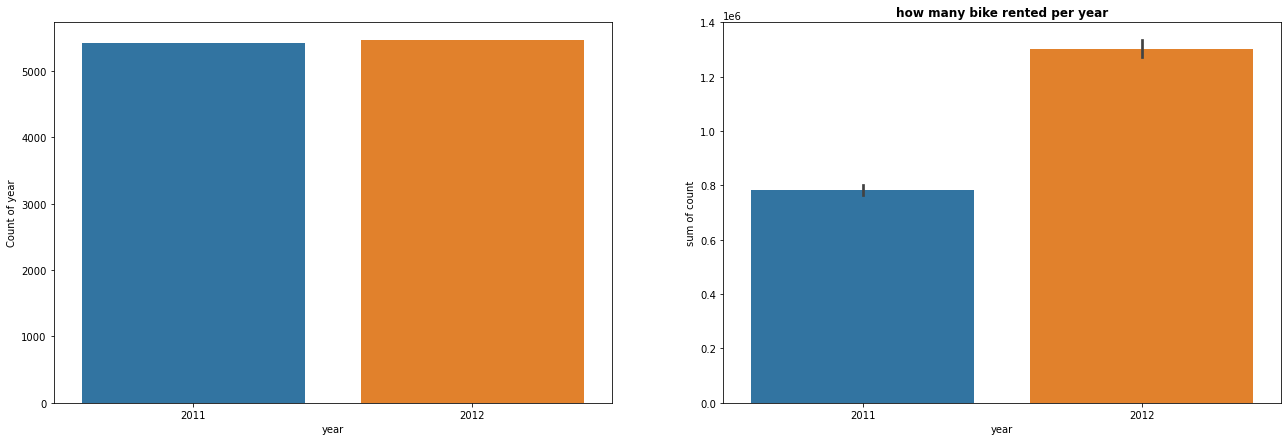

In [66]:
plt.figure(figsize=[22,7])

plt.subplot(1,2,1)
sns.countplot(data=df , x="year")
plt.xlabel("year" )
plt.ylabel("Count of year" )

plt.subplot(1,2,2)
sns.barplot(data=df , x="year" , y='count' , estimator=sum)
plt.xlabel("year" )
plt.ylabel("sum of count" )
plt.title("how many bike rented per year",weight='bold')
plt.show()

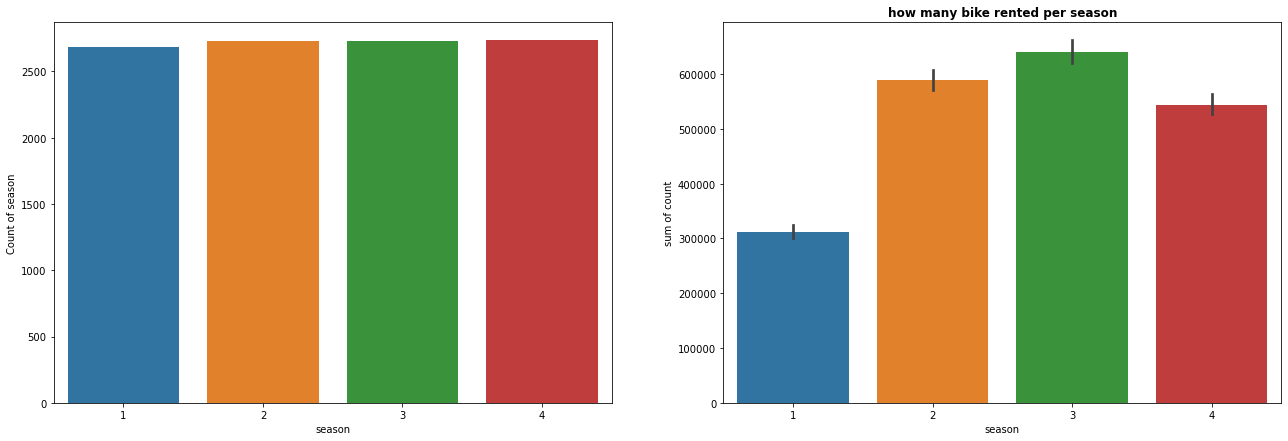

In [67]:
plt.figure(figsize=[22,7])

plt.subplot(1,2,1)
sns.countplot(data=df , x="season")
plt.xlabel("season" )
plt.ylabel("Count of season" )

plt.subplot(1,2,2)
sns.barplot(data=df , x="season" , y='count' , estimator=sum)
plt.xlabel("season" )
plt.ylabel("sum of count" )
plt.title("how many bike rented per season",weight='bold')
plt.show()

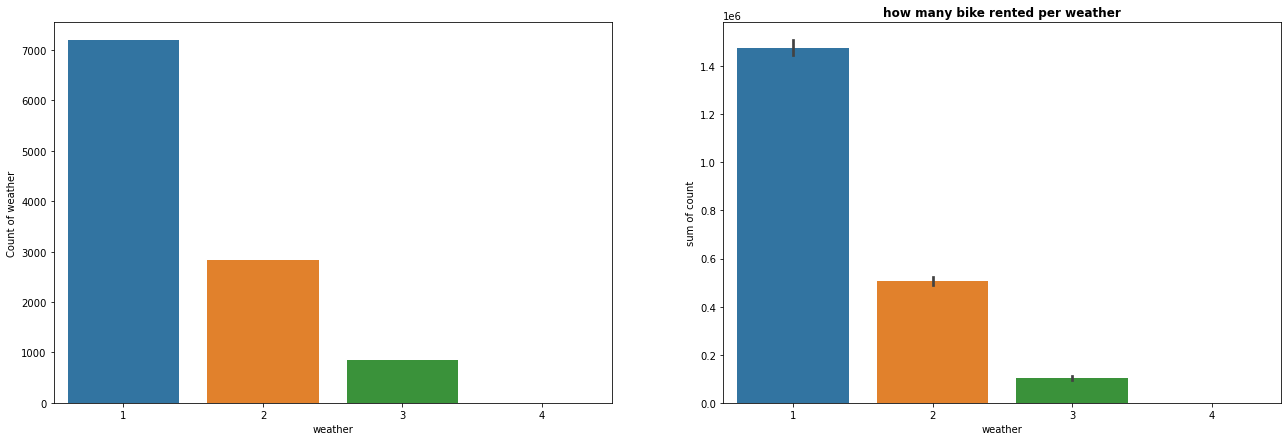

In [68]:
plt.figure(figsize=[22,7])

plt.subplot(1,2,1)
sns.countplot(data=df , x="weather")
plt.xlabel("weather" )
plt.ylabel("Count of weather" )

plt.subplot(1,2,2)
sns.barplot(data=df , x="weather" , y='count' , estimator=sum)
plt.xlabel("weather" )
plt.ylabel("sum of count" )
plt.title("how many bike rented per weather",weight='bold')
plt.show()

# Correlation between variables

In [69]:
df.corr()["count"]

temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
hour          0.400601
month         0.166862
year          0.260403
Name: count, dtype: float64

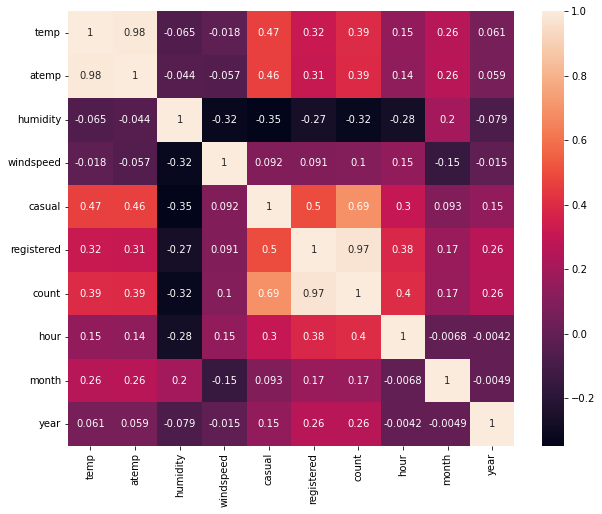

In [71]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),annot=True)
plt.show()

# Find length of outliers

In [75]:
Q1 = np.percentile(df["count"],25)
Q3 = np.percentile(df["count"],75)

In [97]:
IQR = Q3-Q1
upper_fence = Q3+(IQR*1.5)
lower_fence = max(0,Q1-(IQR*1.5))

In [98]:
print("Interquartile range is ",IQR)
print("Upper fence is {0} \nLower fence is {1}".format(upper_fence,lower_fence))

Interquartile range is  242.0
Upper fence is 647.0 
Lower fence is 0


In [101]:
outlier_df = df[(df["count"]>upper_fence) | (df["count"]<lower_fence)]
outlier_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year,TimeSlot
6611,2012-03-12 18:00:00,1,0,1,2,24.60,31.060,43,12.9980,89,623,712,18,3,2012,Late Evening
6634,2012-03-13 17:00:00,1,0,1,1,28.70,31.820,37,7.0015,62,614,676,17,3,2012,Late Evening
6635,2012-03-13 18:00:00,1,0,1,1,28.70,31.820,34,19.9995,96,638,734,18,3,2012,Late Evening
6649,2012-03-14 08:00:00,1,0,1,1,18.04,21.970,82,0.0000,34,628,662,8,3,2012,Early Morning
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,17,3,2012,Late Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2012-12-11 08:00:00,4,0,1,2,13.94,15.150,61,19.9995,16,708,724,8,12,2012,Early Morning
10702,2012-12-12 08:00:00,4,0,1,2,10.66,12.880,65,11.0014,18,670,688,8,12,2012,Early Morning
10726,2012-12-13 08:00:00,4,0,1,1,9.84,11.365,60,12.9980,24,655,679,8,12,2012,Early Morning
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0000,10,652,662,8,12,2012,Early Morning


## length of outlier

In [102]:
len(outlier_df)

300

# Hypothesis Testing

### Hypothesis Testing 1
**2- Sample T-Test** 
- to check if Working Day has an effect on the number of electric cycles rented

**Null Hypothesis:** Working day has no effect on the number of cycles being rented.

**Alternate Hypothesis:** Working day has effect on the number of cycles being rented.

**Significance level (alpha): 0.05**

We will use the **2-Sample T-Test** to test the hypothess defined above

In [130]:
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values
statistic , p_value = ttest_ind(a=data_group1, b=data_group2)
if p_value>=0.05:
    print(f"statistic value is {statistic}, \npvalue is {p_value}\nReject to fail Null hypothesis")
else:
    print(f"statistic value is {statistic}, \npvalue is {p_value}\nReject Null hypothesis \naccept alternate hypothesis")

statistic value is -1.2096277376026694, 
pvalue is 0.22644804226361348
Reject to fail Null hypothesis


**Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.**

### Hypothesis Testing 2
**Null Hypothesis:** Number of cycles rented is similar in different weather and season.

**Alternate Hypothesis:** Number of cycles rented is not similar in different weather and season.

**Significance level (alpha): 0.05**

Here, we will use the **ANOVA** to test the hypothess defined above

In [117]:
# defining the data groups for the ANOVA

weather_1 = df[df['weather']==1]['count'].values
weather_2 = df[df['weather']==2]['count'].values
weather_3 = df[df['weather']==3]['count'].values
weather_4 = df[df['weather']==4]['count'].values

season_1 = df[df['season']==1]['count'].values
season_2 = df[df['season']==2]['count'].values
season_3 = df[df['season']==3]['count'].values
season_4 = df[df['season']==4]['count'].values


### conduct the one-way anova of weather

In [129]:
statistic , p_value = f_oneway(weather_1,weather_2,weather_3,weather_4)
if p_value>=0.05:
    print(f"statistic value is {statistic}, \npvalue is {p_value}\nReject to fail Null hypothesis")
else:
    print(f"statistic value is {statistic}, \npvalue is {p_value}\nReject Null hypothesis \naccept alternate hypothesis")

statistic value is 65.53024112793271, 
pvalue is 5.482069475935669e-42
Reject Null hypothesis 
accept alternate hypothesis


### conduct the one-way anova of season

In [131]:
statistic , p_value = f_oneway(season_1,season_2,season_3,season_4)
if p_value>=0.05:
    print(f"statistic value is {statistic}, \npvalue is {p_value}\nReject to fail Null hypothesis")
else:
    print(f"statistic value is {statistic}, pvalue is {p_value}\nReject Null hypothesis \naccept alternate hypothesis")

statistic value is 236.94671081032106, pvalue is 6.164843386499654e-149
Reject Null hypothesis 
accept alternate hypothesis


### conduct the one-way anova of season and weather

In [132]:
statistic , p_value = f_oneway(weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4)
if p_value>=0.05:
    print(f"statistic value is {statistic}, \npvalue is {p_value}\nReject to fail Null hypothesis")
else:
    print(f"statistic value is {statistic}, pvalue is {p_value}\nReject Null hypothesis \naccept alternate hypothesis")

statistic value is 127.96661249562491, pvalue is 2.8074771742434642e-185
Reject Null hypothesis 
accept alternate hypothesis


**Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather and season conditions**

### Hypothesis Testing 3

**Null Hypothesis (H0):** Weather is independent of the season

**Alternate Hypothesis (H1):** Weather is dependent of the season

**Significance level (alpha): 0.05**
    
We will use **chi-square test** to test hypyothesis defined above.

In [136]:
data_table = pd.crosstab(df['season'], df['weather'] )
print("Observed values:")
data_table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [140]:
statistic, p_value, dof, array = chi2_contingency(data_table)
statistic , p_value = f_oneway(weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4)
if p_value>=0.05:
    print(f"statistic value is {statistic}, \npvalue is {p_value}, \nDegree of freedom is {dof},\narray is {array}\nReject to fail Null hypothesis")
else:
    print(f"statistic value is {statistic}, \npvalue is {p_value}, \nDegree of freedom is {dof},\narray is {array}\nReject Null hypothesis \naccept alternate hypothesis")

statistic value is 127.96661249562491, 
pvalue is 2.8074771742434642e-185, 
Degree of freedom is 9,
array is [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
Reject Null hypothesis 
accept alternate hypothesis


**Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that    Weather is dependent on the season.**

### Insights

- In **summer** and **fall** seasons more bikes are rented as compared to other seasons.
- Whenever its a **holiday** more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
- Whenever there is **rain, thunderstorm, snow or fog**, there were less bikes were rented. 


- Whenever the humidity is less than 20, number of bikes rented is very very low.
- Whenever the temperature is less than 10, number of bikes rented is less.
- Whenever the windspeed is greater than 35, number of bikes rented is less.


### Recommendations
- In **summer** and **fall** seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
- With a significance level of 0.05, **workingday** has no effect on the number of bikes being rented.
- In very low humid days, company should have less bikes in the stock to be rented.
- Whenever temprature is less than 10 or in very cold days, company should have less bikes.
- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.

https://drive.google.com/drive/folders/1fl9kl4n9_JM6248g0tk6hd6jvGiDh_M6?usp=sharing